### Bloom Filter structure 

In [1]:
import hashlib
import time
import matplotlib.pyplot as plt
import random

class BloomFilter:
    def __init__(self, size, hash_count):
        self.size = size
        self.hash_count = hash_count
        self.bit_array = [0] * size

    def _hash(self, item, seed):
        hash1 = int(hashlib.sha256(item.encode('utf-8')).hexdigest(), 16)
        hash2 = int(hashlib.sha256((item + str(seed)).encode('utf-8')).hexdigest(), 16)
        return (hash1 + seed * hash2) % self.size

    def add(self, item):
        for i in range(self.hash_count):
            index = self._hash(item, i)
            self.bit_array[index] = 1

    def check(self, item):
        for i in range(self.hash_count):
            index = self._hash(item, i)
            if self.bit_array[index] == 0:
                return False
        return True

### Benchmarking the filter

In [2]:
def benchmark_bloom_filter(size, hash_count, sample_size):
    bloom = BloomFilter(size=size, hash_count=hash_count)
    sample_items = [f"item{i}" for i in range(sample_size)]
    
    # Timing insertion
    start_time = time.time()
    for item in sample_items:
        bloom.add(item)
    insert_time = time.time() - start_time
    
    # Timing search
    start_time = time.time()
    for item in sample_items:
        bloom.check(item)
    search_time = time.time() - start_time

    return insert_time, search_time


### Plotting performance

In [3]:
def plot_performance(sizes, insert_times, search_times):
    plt.figure(figsize=(10, 5))
    plt.plot(sizes, insert_times, label='Insertion Time', marker='o')
    plt.plot(sizes, search_times, label='Search Time', marker='x')
    plt.xlabel('Number of Items')
    plt.ylabel('Time (seconds)')
    plt.title('Bloom Filter Performance')
    plt.legend()
    plt.grid(True)
    plt.show()

### Example 

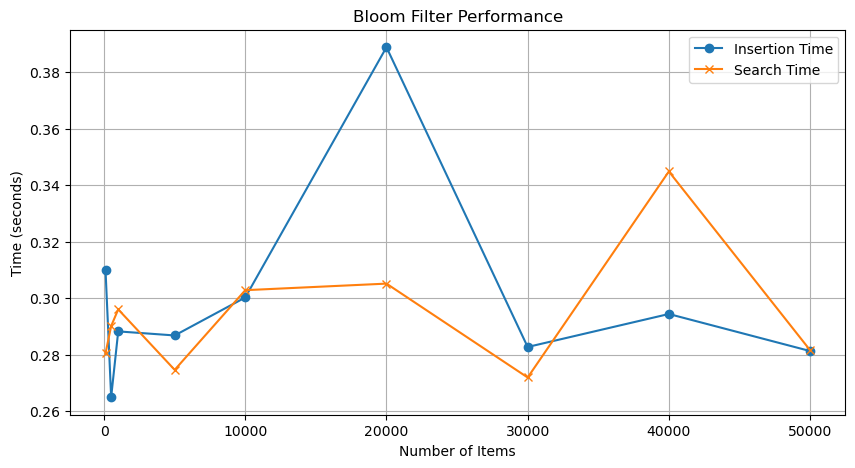

In [4]:
# Parameters for Bloom filter and false positive verification
size = 100000
hash_count = 5
sample_size = 10000
inserted_items = [f"item{i}" for i in range(sample_size)] # Items that will be inserted into the Bloom filter
test_items = [f"non_item{i}" for i in range(sample_size)] # Items for testing false positives


# Example parameters for benchmarking
sizes = [100, 500, 1000, 5000, 10000, 20000, 30000, 40000, 50000]
hash_count = 5

# Perform benchmarks
insert_times = []
search_times = []
for size in sizes:
    insert_time, search_time = benchmark_bloom_filter(size, hash_count, sample_size)
    insert_times.append(insert_time)
    search_times.append(search_time)

# Plot performance
plot_performance(sizes, insert_times, search_times)

### Verifying false-positives

In [9]:
def verify_false_positives(bloom, inserted_items, test_items, expected_false_positive_rate):
    # Insert items into the Bloom filter
    for item in inserted_items:
        bloom.add(item)

    # Test for false positives
    false_positives = sum(1 for item in test_items if bloom.check(item))
    actual_rate = false_positives / len(test_items)
    print(f"Actual false positive rate: {actual_rate}")
    
    
# Create a Bloom filter for false positive verification
verification_bloom = BloomFilter(size=size, hash_count=hash_count)

# Verify false positives with an expected rate
expected_false_positive_rate = 0.01  # This value was not provided earlier, defining it here for the tests


In [10]:
# Create a Bloom filter for false positive verification
verification_bloom = BloomFilter(size=size, hash_count=hash_count)

# Verify false positives with an expected rate
expected_false_positive_rate = 0.01  # This value was not provided earlier, defining it here for the tests
verify_false_positives(verification_bloom, inserted_items, test_items, expected_false_positive_rate)

Actual false positive rate: 0.0997


In [11]:
# Verify false positives again with a large Bloom filter
large_bloom = BloomFilter(size=100000, hash_count=hash_count)
verify_false_positives(large_bloom, inserted_items, test_items, expected_false_positive_rate)


Actual false positive rate: 0.0083
